In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/input/df.csv', index_col='datetime')
df.index = pd.to_datetime(df.index, utc=True)
df['datetimeja'] = df.index.tz_convert('Asia/Tokyo')

In [3]:
df['date'] = df['datetimeja'].dt.date
df['time'] = df['datetimeja'].dt.time

In [4]:
df.head()

,stepCount,datetimeja,date,time
datetime,,,,
2017-06-27 23:04:40+00:00,504,2017-06-28 08:04:40+09:00,2017-06-28,08:04:40
2017-06-27 23:14:34+00:00,871,2017-06-28 08:14:34+09:00,2017-06-28,08:14:34
2017-06-27 23:22:53+00:00,25,2017-06-28 08:22:53+09:00,2017-06-28,08:22:53
2017-06-27 23:29:45+00:00,29,2017-06-28 08:29:45+09:00,2017-06-28,08:29:45
2017-06-27 23:36:05+00:00,17,2017-06-28 08:36:05+09:00,2017-06-28,08:36:05


# day of the week

In [5]:
df['dow'] = df['datetimeja'].dt.weekday

In [6]:
df.head()

,stepCount,datetimeja,date,time,dow
datetime,,,,,
2017-06-27 23:04:40+00:00,504,2017-06-28 08:04:40+09:00,2017-06-28,08:04:40,2
2017-06-27 23:14:34+00:00,871,2017-06-28 08:14:34+09:00,2017-06-28,08:14:34,2
2017-06-27 23:22:53+00:00,25,2017-06-28 08:22:53+09:00,2017-06-28,08:22:53,2
2017-06-27 23:29:45+00:00,29,2017-06-28 08:29:45+09:00,2017-06-28,08:29:45,2
2017-06-27 23:36:05+00:00,17,2017-06-28 08:36:05+09:00,2017-06-28,08:36:05,2


In [7]:
summary = df.groupby(['date', 'dow']).sum()

- Monday: 0
- Sunday: 6

In [8]:
summary.head(10)

,,stepCount
date,dow,
2017-06-28,2,6651
2017-06-29,3,7063
2017-06-30,4,8806
2017-07-01,5,4053
2017-07-02,6,19320
2017-07-03,0,10776
2017-07-04,1,8513
2017-07-05,2,4679
2017-07-06,3,8605


In [9]:
summaryDow = summary.groupby(['dow']).agg({'mean', 'std', 'min', 'median', 'max'})

In [10]:
summaryDow

stepCount                                        
          max          std  median   min         mean
dow                                                  
0       17546  3487.723528  7151.0   808  7727.831325
1       24254  3896.753357  7239.0  3317  8197.987805
2       15594  3023.846394  6749.5  2662  7675.392857
3       48251  5437.493413  7291.5  3051  8398.345238
4       15260  2852.566835  7201.5  2572  7630.321429
5       60924  7009.961815  7993.0   402  8925.168675
6       27543  5089.507182  7951.0   756  8470.349398

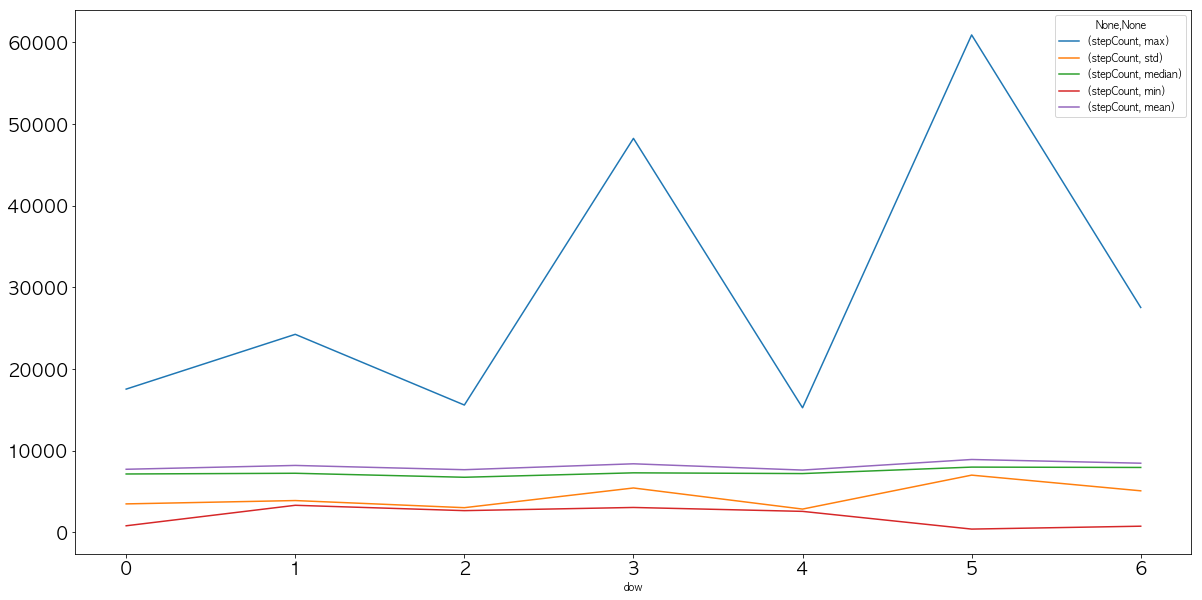

In [11]:
summaryDow.plot(figsize=(20, 10), fontsize=18)

In [12]:
summaryDow1 = summary.groupby(['dow']).agg({'mean', 'std', 'min', 'median'})

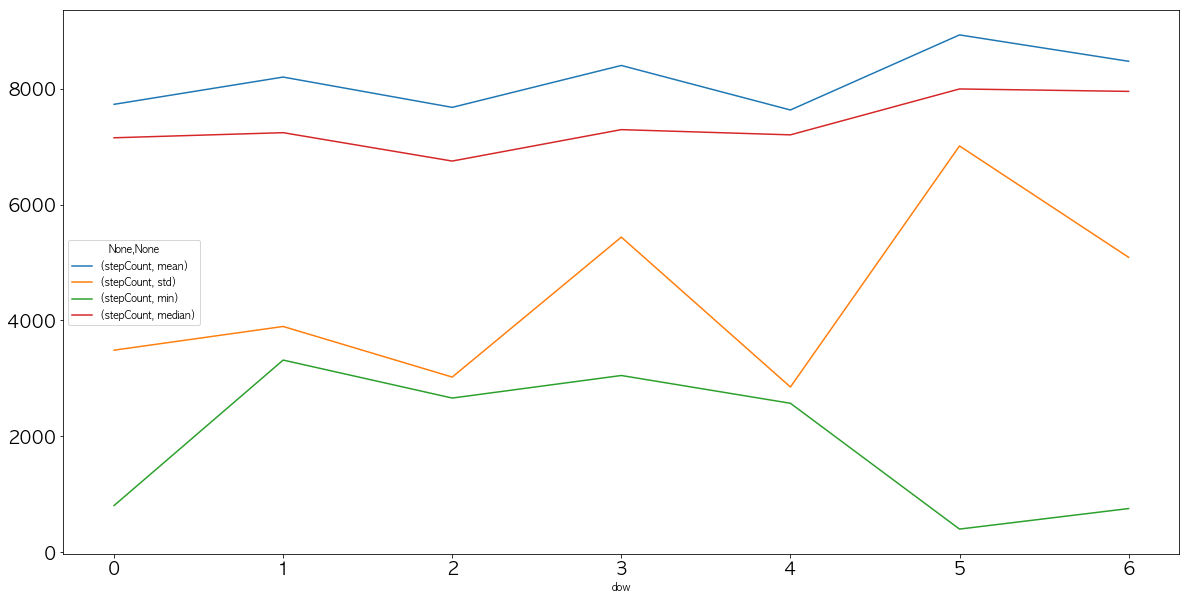

In [13]:
summaryDow1.plot(figsize=(20, 10), fontsize=18)

# 8000歩に達している割合

In [16]:
(summary['stepCount'] >= 8000).groupby(['dow']).mean()

dow
0    0.421687
1    0.390244
2    0.369048
3    0.428571
4    0.416667
5    0.493976
6    0.493976
Name: stepCount, dtype: float64

# 4000歩未満の割合

In [21]:
(summary['stepCount'] <= 4000).groupby(['dow']).mean()

dow
0    0.132530
1    0.060976
2    0.035714
3    0.047619
4    0.059524
5    0.120482
6    0.180723
Name: stepCount, dtype: float64

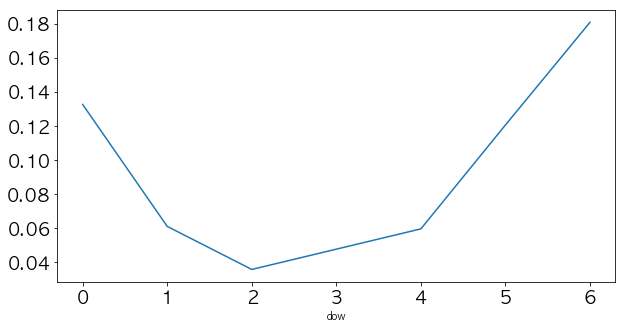

In [23]:
((summary['stepCount'] <= 4000).groupby(['dow']).mean()).plot(figsize=(10, 5), fontsize=18)